<a href="https://colab.research.google.com/github/andrebelem/pythonverse/blob/main/PyGMT_on_COLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# because I like to enjoy my coffee in silence (3 runs averaged 8 minutes to install everything ! keep drinking your coffee)
%%capture
!sudo apt update 
!sudo apt upgrade -y
!sudo apt install -y build-essential cmake libcurl4-gnutls-dev libnetcdf-dev gdal-bin libgdal-dev libfftw3-dev libpcre3-dev liblapack-dev libblas-dev libglib2.0-dev ghostscript ghostscript-x graphicsmagick ffmpeg xdg-utils
# clone gmt from source
!git clone --depth 50 https://github.com/GenericMappingTools/gmt
# cmake everything
!cmake /content/gmt
# build and install
!cmake --build . --target install

In [2]:
# just for the paranoics (answer should be )/usr/local/bin/gmt
!which gmt

/usr/local/bin/gmt


In [3]:
# install pygmt with pip
%%capture
!pip install pygmt

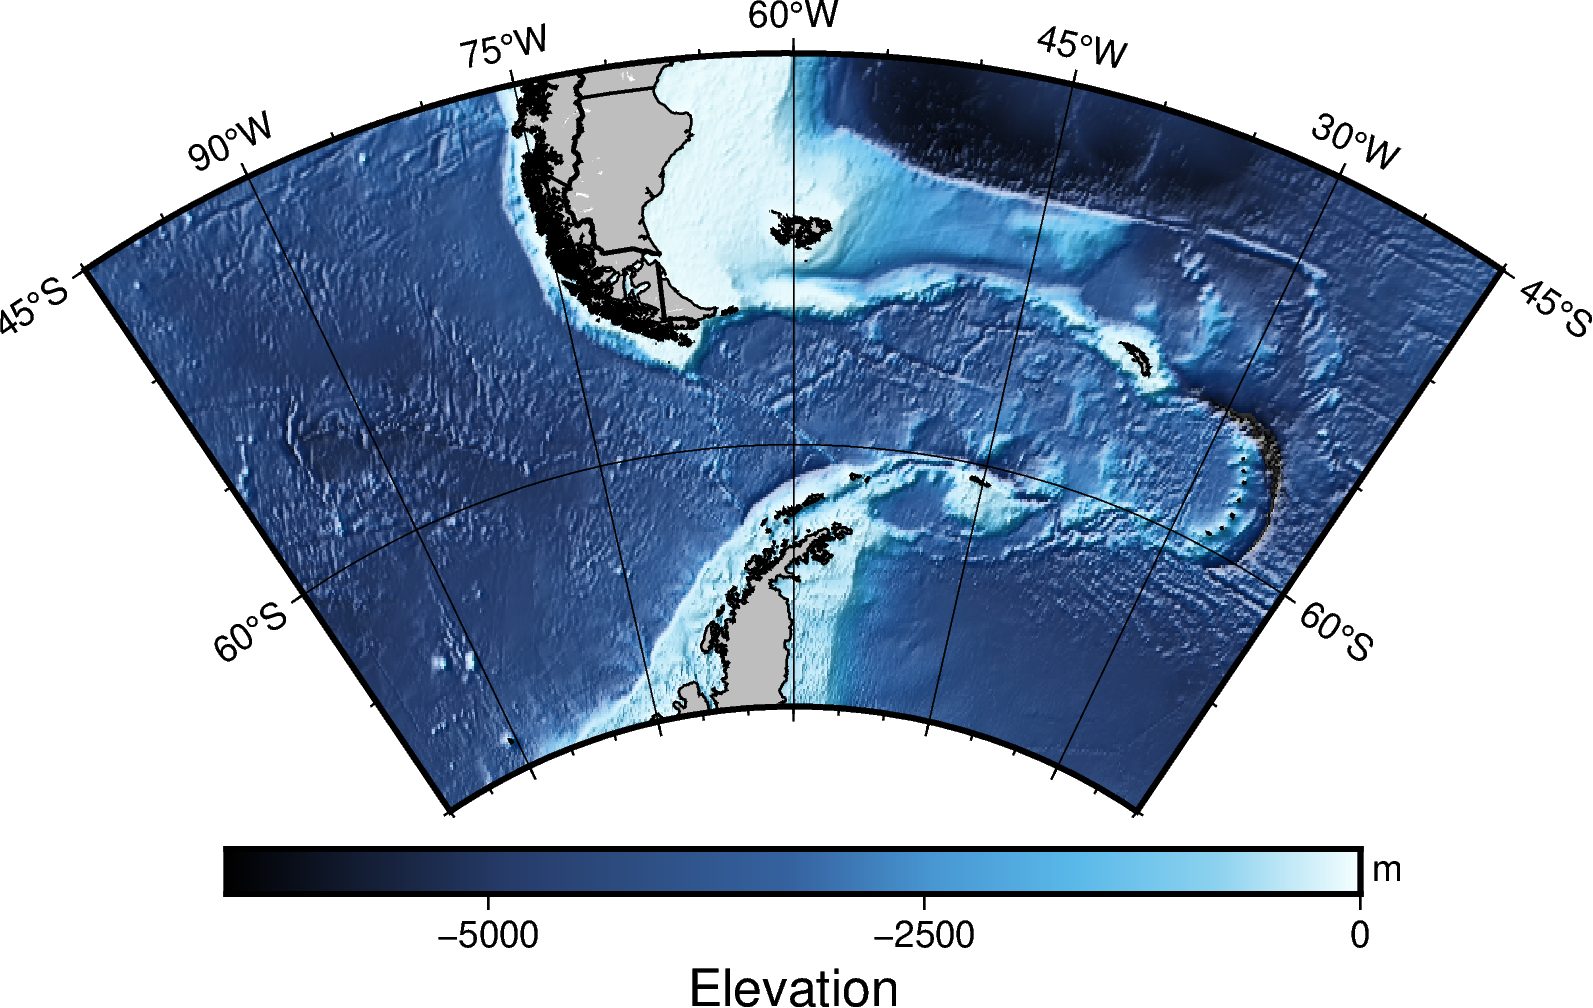

In [18]:
# make your magic and enjoy
import pygmt

grid = pygmt.datasets.load_earth_relief(
    "05m", region=[-100, -20, -70, -45], registration="gridline"
)
fig = pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE="plain")
pygmt.config(FORMAT_GEO_MAP="DF")

mycmap = pygmt.makecpt(cmap="geo", series=[-6500, 0, 10])

fig.grdimage(grid=grid,
    cmap=mycmap,
    region=[-100, -20, -70, -45],
    projection="L-60/-60/-70/-45/12c",
    shading='+a-45+nt1'
    )
fig.coast(
    shorelines="1/0.5p",
    region=[-100, -20, -70, -45],
    projection="L-60/-60/-70/-45/12c",
    land="gray",
    borders=["1/thick,black", "2/thin,black"],
    frame=['a15f5g15','WNsE']
)
fig.colorbar(frame=["a2500", "x+lElevation", "y+lm"])

fig.show()